<h1 style="text-align: center;">Block Diagrams and System Stability</h1>
<p style="text-align: center;">Lab 7</p>
<p style="text-align: center;">Spring 2024</p>

### 1. Purpose 
Become familiar with Laplace-domain block diagrams and use the factored form of the transfer function to judge system stability. 

### 2. Deliverables Overview 
##### Part 1  
[ ] Equations for the transfer functions in **Task 1**.  
[ ] Printed output using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Equation of the open-loop transfer function for **Task 3**
[ ] Plot showing the step response of the open-loop transfer function for **Task 4**.
  
##### Part 2
[ ] Equation of the closed-loop transfer function for **Task 1**
[ ] Printed output and numerical equations using **scipy.signal.tf2zpk()** for **Task 2**.  
[ ] Plot showing the step response of the open-loop transfer function for **Task 3**. 

![Block diagram](BlockDiagram1.png)

$$ G(s) = \frac{s + 9}{(s^2 - 6s - 16)(s + 4)} $$  
$$ A(s) = \frac{s + 4}{S^2 + 4s +3} $$  
$$ B(s) = s^2 + 26s + 168 $$

### 3. Part 1
##### 3.1 Purpose
Analyze a block diagram and learn how to use Python functions to perform the same analysis.  
##### 3.2 Tasks   
1. Type $G(s)$, $A(s)$, and $B(s)$ in factored form, isolating the poles and zeros. Identify the poles and zeros of each function.

In [16]:
import scipy.signal as sig

numG = [1,9]
denG = sig.convolve([1, -6, -16],[1, 4])
numA = [1,4]
denA = [1,4,3]
numB = [1,26,168]
denB = [1]
#solve for poles
res, pol, k = sig.residue(numG,denG)
print("G: Residue: ", res, "\nPoles: ", pol, "\nCoefficient: ", k)
res, pol, k = sig.residue(numA,denA)
print("A: Residue: ", res, "\nPoles: ", pol, "\nCoefficient: ", k)
res, pol, k = sig.residue(numB,denB)
print("B: Residue: ", res, "\nPoles: ", pol, "\nCoefficient: ", k)



G: Residue:  [-0.35        0.20833333  0.14166667] 
Poles:  [-2. -4.  8.] 
Coefficient:  []
A: Residue:  [ 1.5 -0.5] 
Poles:  [-1. -3.] 
Coefficient:  []
B: Residue:  [] 
Poles:  [] 
Coefficient:  [  1.  26. 168.]


Factored form of $G(s)$:  
>$\frac{s+9}{(s-8)(s+2)(s+4)}$

Factored form of $A(s)$:  
>$\frac{s+4}{(s+1)(s+3)}$  

Factored form of $B(s)$:  
>(s+12)(s+14)

Poles of $G(s)$:  
>-2, -4, 8

Poles of $A(s)$:  
>  -1, -3

Poles of $B(s)$:  
>  N/A

Zeros of $G(s)$:  
>  s = -9

Zeros of $A(s)$:  
>  s = -4

Zeros of $B(s)$:  
> s = -14 or s = -12

###### 3.2.1 Example Code  
The following example code uses **scipy.signal.convolve()** to expand a factored transfer function, described by $H(s) = \frac{(8s + 1)(2s +3)}{(9s^2 + 2s)(s + 4)}$.

In [7]:
import scipy.signal as sig

num = sig.convolve([8, 1], [2, 3])
den = sig.convolve([9, 2, 0], [1, 4])

print(f"Expanded Numerator: {num}\nExpanded Denominator: {den}")

Expanded Numerator: [16 26  3]
Expanded Denominator: [ 9 38  8  0]


Making the expanded transfer function $H(s) = \frac{16s^2 + 26s + 3}{9s^3 + 38s^2 + 8s}$.  

2. Use the **scipy.signal.tf2zpk()** function to check your results from **Task 1** and print the output. *Note: since $B(s)$ has a denominator of 1, you may use **numpy.roots()** instead*.

In [8]:
# Insert all necessary imports here
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Insert code for Part 1 Task 2 here
numG = [1,9]
denG = sig.convolve([1, -6, -16],[1, 4])
numA = [1,4]
denA = [1,4,3]
numB = [1,26,168]
denB = [1]

z, p, k = sig.tf2zpk(numG, denG)
print("G:   Zeros: ", z, "\n     Poles: ", p)

z, p, k = sig.tf2zpk(numA, denA)
print("A:   Zeros: ", z, "\n     Poles: ", p)

root = np.roots(numB)
print("B:   Roots: ", root)

G:   Zeros:  [-9.] 
     Poles:  [ 8. -4. -2.]
A:   Zeros:  [-4.] 
     Poles:  [-3. -1.]
B:   Roots:  [-14. -12.]


3. Type and properly format the open-loop transfer function where $x(t)$ is the input and $y(t)$ is the output. Keep your answer in factored form.

Insert the open-loop transfer function here:  
$$ H(s) = \frac{y(t)}{x(t)} = A(s)*G(s) = \frac{numA*numG}{denA*denG}$$
$$ H(s) = \frac{(s+4)(s+9)}{(s-8)(s+2)(s+4)(s+1)(s+3)}

4. Plot the step response of the open-loop transfer function. Use **scipy.signal.convolve()** to expand the numerator and denominator of the open-loop transfer function. 

Expanded Numerator: [ 1 13 36] 
Expanded Denominator: [   1    2  -45 -230 -376 -192]


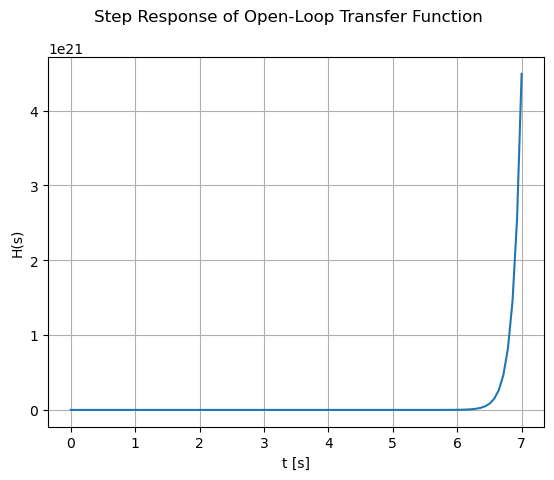

In [20]:
# Insert code plotting the step response of the open-loop transfer function here
numG = [1,9]
denG = sig.convolve([1, -6, -16],[1, 4])
numA = [1,4]
denA = [1,4,3]

totNUM = sig.convolve(numA, numG)
totDEN = sig.convolve(denA, denG)
print(f"Expanded Numerator: {totNUM} \nExpanded Denominator: {totDEN}")

tout, yout = sig.step((totNUM, totDEN))

#plot
plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("Step Response of Open-Loop Transfer Function")
plt.show()

### 4. Part 2
##### 4.1 Purpose
Become more familiar with using Python for analyzing block diagrams and stability of closed-loop systems.
##### 4.2 Tasks   
1. Type the closed-loop transfer function for the given block diagram symbolically in terms of each blocks numerator and denominator (i.e., numG, denG, ...).

Insert the closed-loop transfer function here:  
$$ H(s) = A(s)*\frac{G(s)}{1+G(s)B(s)} $$
$$ H(s) = \frac{numA * \frac{numG}{denG}}{denA*(1+\frac{numG}{denG}*\frac{numB}{1})}$$
simplified: $H(s) = \frac{numA * numG}{denA * (denG + numB * numG)}$

2. Using **scipy.signal.convolve()** and **scipy.signal.tf2zpk()** to perform all the arithmetic, find numerical values for the total numerator and denominator, find poles and zeros, then type the resulting numeric transfer function in both expanded and factored form.

In [33]:
# Insert code for Part 2 Task 2 here
numG = [1,9]
denG = sig.convolve([1, -6, -16],[1, 4])
numA = [1,4]
denA = [1,4,3]
numB = [1,26,168]
denB = [1]

#total numerators and denominators
totNUM = sig.convolve(numA, numG)
totDEN = sig.convolve(denA, denG + sig.convolve(numB, numG))

#print expanded
print(f"Expanded Numerator: {totNUM} \nExpanded Denominator: {totDEN}")

#print poles, zeros
z, p, k = sig.tf2zpk(totNUM, totDEN)
print(f"\nZeros: {z} \nPoles: {p}")

Expanded Numerator: [ 1 13 36] 
Expanded Denominator: [   2   41  500 2995 6878 4344]

Zeros: [-9. -4.] 
Poles: [-5.16237064+9.51798197j -5.16237064-9.51798197j -6.17525872+0.j
 -3.        +0.j         -1.        +0.j        ]


Insert the expanded numeric closed-loop transfer function here:  
$$ H(s) = \frac{s^2 + 13s + 36}{2s^5 + 41s^4 + 500s^3 + 2995s^2 + 6878s + 4344}$$

Insert the factored numeric closed-loop transfer function here:  
$$ H(s) = \frac{(s+9)(s+4)}{(s+(5.162+9.518j))(s+(5.162-9.518j))(s+6.175)(s+3)(s+1)}$$

3. Plot the step response of the closed-loop transfer function using **scipy.signal.step()**.

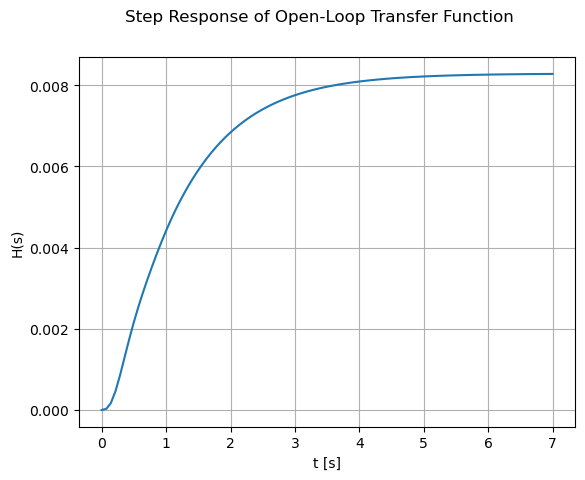

In [34]:
# Insert code for Part 2 Task 3 here
numG = [1,9]
denG = sig.convolve([1, -6, -16],[1, 4])
numA = [1,4]
denA = [1,4,3]
numB = [1,26,168]
denB = [1]

#total numerators and denominators
totNUM = sig.convolve(numA, numG)
totDEN = sig.convolve(denA, denG + sig.convolve(numB, numG))

tout, yout = sig.step((totNUM, totDEN))

#plot
plt.figure()
plt.plot(tout, yout)
plt.grid()
plt.ylabel("H(s)")
plt.xlabel("t [s]")
plt.suptitle("Step Response of Open-Loop Transfer Function")
plt.show()

### 5. Questions
1. Considering the expression found in **Part 1, Task 3**, is the open-loop response stable? Explain why or why not.    
>No, the open-loop response is not stable. This is because there is a right-hand side factor in the denominator. 
2. Does the plot from **Part 1, Task 4** support your answer to **Question 1**? Explain how or how it does not.  
>Yes, the graph goes towards infinity as it approaches 8. Specifically, by the time the graph hits t = 7, the values are approaching 4e21 which indicates instability.  
3. In **Part 1, Task 4**, why does convolving the factored terms using **scipy.signal.convolve()** result in the expanded form of the numerator and denominator? Would this work with your user-defined convolution function from **Lab 3**? Why or why not?  
>It returns the expanded form of the numerator and denominator because it's treating the convolution as a multiplication since we're providing the values in the s-domain. This would also work for my convolution function from Lab 3 since I also treated the convolution as a multiplication problem as the values supplied were in the s-domain already.  
4. Using the closed-loop transfer function found in **Part 2, Task 1**, is the closed-loop response stable? Explain why or why not.
>I believe that the closed-loop transfer function is stable. Since there are only left-hand side factors and no right-hand factos in the denominator, the function is stable.
5. Does the result from **Part 2, Task 3** support your answer to **Question 4**? Explain how or how it does not.  
>Yes. Unlike the graph for the open-loop function, this graph is consistent and levels out at very small values. This indicates that the function is stable.  
6. What is the difference between **scipy.signal.residue()** used in **Lab 6** and **scipy.signal.tf2zpk()** used in this lab?  
>The two functions differ in what they return. The sig.residue() function returns the residue, poles, and coefficients of the given system. The sig.tf2zpk() function returns the zeros, poles, and system gain of the given system.
7. Is it possible for an open-loop system to be stable? What about for a closed-loop system to be unstable? Explain how or how it is not for each.  
>Depending on how the systems are designed, both options are possible. To make a system unstable, the denominator should have a right-hand side factor or a (s-3) for example. For systems to be stable, they need to have only left-hand side factors in the denominator which could be (s+3).  
8. Leave any feedback on the clarity of lab tasks, expectations, and deliverables.  
>I have no feedback :\)